In [1]:
from src.spec_slope import *
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial as P

## White noise test

In [2]:
wn_array = np.random.uniform(0, 1, (128, 128))

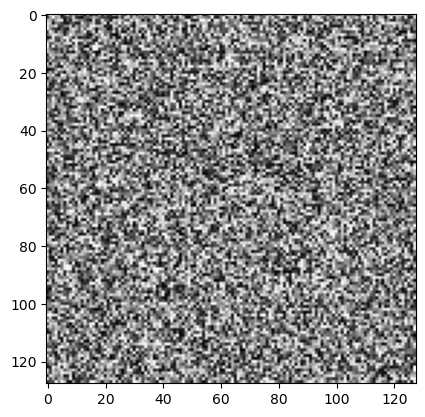

In [3]:
plt.imshow(wn_array, cmap='gray')

In [4]:
spec_slope(wn_array, hanning=False)

(0.008926762068191723, 3.4973115663745076)

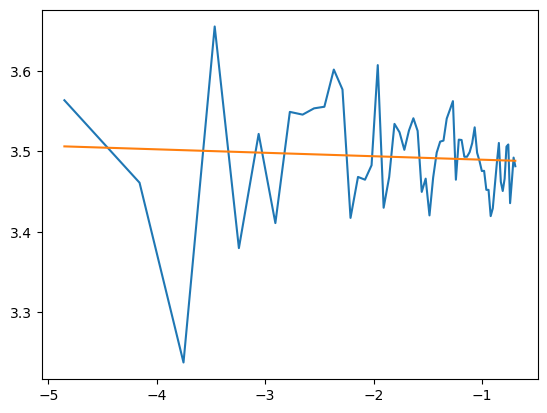

In [5]:
f, s = polar_average(np.abs(np.fft.fft2(wn_array)))
line = P.fit(np.log(f), np.log(s), 1)
plt.plot(np.log(f), np.log(s))
plt.plot(np.log(f), line(np.log(f)))

## Pink noise test

In [10]:
ft_arr = np.fft.fftshift(np.fft.fft2(wn_array))
_x, _y = np.mgrid[0:ft_arr.shape[0], 0:ft_arr.shape[1]]
f = np.hypot(_x - ft_arr.shape[0] / 2, _y - ft_arr.shape[1] / 2)
pink_ft_arr = ft_arr / np.sqrt(f)
pink_ft_arr = np.nan_to_num(pink_ft_arr, nan=0, posinf=0, neginf=0)

pn_array = np.fft.ifft2(np.fft.ifftshift(pink_ft_arr)).real

/tmp/ipykernel_1952961/2592131080.py:4: RuntimeWarning: divide by zero encountered in divide
  pink_ft_arr = ft_arr / np.sqrt(f)
/tmp/ipykernel_1952961/2592131080.py:4: RuntimeWarning: invalid value encountered in divide
  pink_ft_arr = ft_arr / np.sqrt(f)


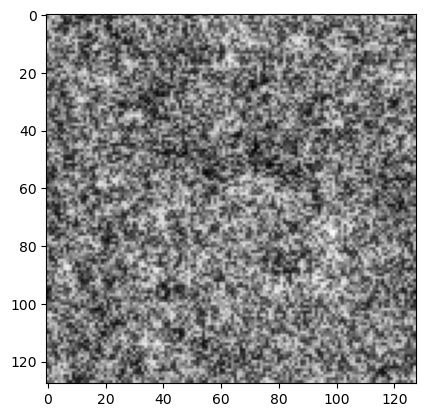

In [11]:
plt.imshow(pn_array, cmap='gray')

In [12]:
spec_slope(pn_array, hanning=False)

(1.0434179349920178, 2.4541740731378674)

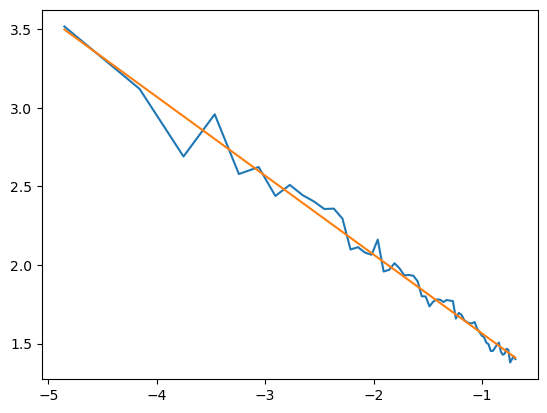

In [13]:
f, s = polar_average(np.abs(np.fft.fft2(pn_array)))
line = P.fit(np.log(f), np.log(s), 1)
plt.plot(np.log(f), np.log(s))
plt.plot(np.log(f), line(np.log(f)))